# 사진 자동 정리하기

사진 정보를 이용하여 위치, 날짜등의 이름으로 사진의 이름을 변경하여 정리합니다. 

[정리 전]

KakaoTalk_2022-05-06 14-58-50.jpg


[정리 후]

시흥시_은행동_2022-06-04 14-06-00.jpg


---

개발 프로세스

1. 사진에서 정보 추출
    * 위도, 경도(GPS 정보 추출) 추출
    * 시간
2. 위도, 경도 -> 주소로 변환
3. 파일이름 변경
    * 변경전:KakaoTalk_2022-05-20 14-22-57.jpg
    * 변경후:아산시_구령리_2022-05-20 14-22-57.jpg

----

## 사진 정보 추출하기

In [2]:
from PIL import Image #파이썬 이미지 라이브러리(Python Image Library)
from PIL.ExifTags import TAGS

image = Image.open(r'./사진/KakaoTalk_2022-06-04 14-06-00.jpg')
info = image._getexif() #이미지 메타정보
info 

{34853: {0: b'\x02\x02\x00\x00',
  2: (37.0, 26.0, 41.294399),
  4: (126.0, 47.0, 53.931119),
  6: 52.0},
 296: 2,
 34665: 262,
 271: 'samsung',
 272: 'SM-S908N',
 305: 'S908NKSU1AVE4',
 306: '2022:06:04 14:06:00',
 531: 2,
 532: (0.0, 255.0, 128.0, 255.0, 128.0, 255.0),
 282: 150.0,
 283: 150.0,
 36864: b'0221',
 37121: b'\x01\x02\x03\x00',
 37377: 7.55,
 36867: '2022:06:04 14:06:00',
 36868: '2022:06:04 14:06:00',
 37378: 2.27,
 37379: 5.96,
 37380: 0.0,
 37381: 2.27,
 37383: 2,
 37385: 0,
 37386: 3.8,
 40961: 1,
 40962: 841,
 41989: 25,
 41990: 0,
 40963: 1121,
 33434: 0.005319148936170213,
 33437: 2.2,
 34850: 2,
 34855: 50,
 41986: 0,
 40960: b'0100',
 41987: 0,
 41988: 1.23}

In [4]:
type(info),len(info)

(dict, 36)

In [8]:
#파일 속성정보 출력
#https://exiftool.org/TagNames/EXIF.html
from PIL.ExifTags import TAGS
for tag,value in info.items():
    # print(value)
    decoded = TAGS.get(tag,tag) #태그숫자를 디코딩
    print(tag,decoded,value)

34853 GPSInfo {0: b'\x02\x02\x00\x00', 2: (37.0, 26.0, 41.294399), 4: (126.0, 47.0, 53.931119), 6: 52.0}
296 ResolutionUnit 2
34665 ExifOffset 262
271 Make samsung
272 Model SM-S908N
305 Software S908NKSU1AVE4
306 DateTime 2022:06:04 14:06:00
531 YCbCrPositioning 2
532 ReferenceBlackWhite (0.0, 255.0, 128.0, 255.0, 128.0, 255.0)
282 XResolution 150.0
283 YResolution 150.0
36864 ExifVersion b'0221'
37121 ComponentsConfiguration b'\x01\x02\x03\x00'
37377 ShutterSpeedValue 7.55
36867 DateTimeOriginal 2022:06:04 14:06:00
36868 DateTimeDigitized 2022:06:04 14:06:00
37378 ApertureValue 2.27
37379 BrightnessValue 5.96
37380 ExposureBiasValue 0.0
37381 MaxApertureValue 2.27
37383 MeteringMode 2
37385 Flash 0
37386 FocalLength 3.8
40961 ColorSpace 1
40962 ExifImageWidth 841
41989 FocalLengthIn35mmFilm 25
41990 SceneCaptureType 0
40963 ExifImageHeight 1121
33434 ExposureTime 0.005319148936170213
33437 FNumber 2.2
34850 ExposureProgram 2
34855 ISOSpeedRatings 50
41986 ExposureMode 0
40960 FlashPi

In [9]:
# GPSInfo 정보 추출

from PIL.ExifTags import TAGS
for tag,value in info.items():
    # print(value)
    decoded = TAGS.get(tag,tag) #태그숫자를 디코딩
    # print(tag,decoded,value)

    if decoded == 'GPSInfo':
        print(f'{decoded}:{value}')


#GPSInfo {0: b'\x02\x02\x00\x00', 2: (37.0, 26.0, 41.294399), 4: (126.0, 47.0, 53.931119), 6: 52.0}

GPSInfo:{0: b'\x02\x02\x00\x00', 2: (37.0, 26.0, 41.294399), 4: (126.0, 47.0, 53.931119), 6: 52.0}


In [10]:
# GPSInfo 정보 추출(위도, 경도)
from PIL.ExifTags import TAGS
for tag,value in info.items():
    # print(value)
    decoded = TAGS.get(tag,tag) #태그숫자를 디코딩
    # print(tag,decoded,value)

    if decoded == 'GPSInfo':
        # print(f'{decoded}:{value}')
        gps_lat =  value.get(2) #위도
        gps_lon =  value.get(4) #경도


print(gps_lat,gps_lon)

(37.0, 26.0, 41.294399) (126.0, 47.0, 53.931119)


In [11]:
# 위도 경도 값 보정 (도,분,초) 1도는 60분이며, 1분은 60초이다. 1도 = 60분 = 3600초

lat = (((gps_lat[2] / 60.0 ) +  gps_lat[1]) / 60.0) + gps_lat[0]
lon = (((gps_lon[2] / 60.0 ) +  gps_lon[1]) / 60.0) + gps_lon[0]

In [12]:
lat,lon

(37.444803999722225, 126.79831419972223)

## 날짜 정보 추출하기

In [15]:
# 2022-06-04 14-06-00
import datetime
from PIL.ExifTags import TAGS
for tag,value in info.items():
    # print(value)
    decoded = TAGS.get(tag,tag) #태그숫자를 디코딩
    # print(tag,decoded,value)

    if decoded == 'DateTime':
        # print(f'{decoded}:{value}')
        print(value)
        dt = datetime.datetime.strptime(value,"%Y:%m:%d %H:%M:%S")
        dtime = dt.strftime("%Y-%m-%d %H-%M-%S")
        print(dtime)       

2022:06:04 14:06:00
2022-06-04 14-06-00


## 위도,경도에서 주소로 변환

https://pypi.org/project/geopy/

In [ ]:
%pip install geopy

In [16]:
from geopy.geocoders import Nominatim

In [18]:
# 지오코드 사용법 살펴보기
# 주소를 위도 경도로 변환

from geopy.geocoders import Nominatim

# test = '구로구 디지털로 27'
test = '강남구 학동로 346'
geolocator = Nominatim(user_agent='South Korea') # user_agent는 식별가능 문자열(아무 문자열)
location = geolocator.geocode(test)

latitude = location.latitude #위도
longitude = location.longitude #경도

print(latitude,longitude )

37.5199698 127.056947


In [19]:
# 위도 경도를 주소로 변환
lat_lng_str = f'{latitude},{longitude}' #위도 경도 문자열
loc = geolocator.reverse(lat_lng_str)
loc.address

'청담역 2번출구, 영동대로, 삼성동, 삼성1동, 강남구, 서울, 06080, 대한민국'

In [20]:


lat_lng_str = '37.444803999722225,126.79831419972223' #위도 경도 문자열
loc = geolocator.reverse(lat_lng_str)
loc.address

'맥도날드, 대은로, 대야동, 은행동, 시흥시, 경기도, 대한민국'

---

## 함수 생성

In [1]:
# 사진 정보 가져오기
# 매개변수: 파일 이름
# 반환값: 위도, 경도, 시간
def getPicInfo(fname):
    image = Image.open(fname)
    info = image._getexif();
    image.close() #close()를 해줄것. 파일이름 변경시 에러발생 가능성 있음. 이미지 파일 스트림 해제

    for tag,value in info.items():
        decoded = TAGS.get(tag, tag)
        # print(f'{decoded} : {value}')
        if decoded == 'GPSInfo':
            gps_lat = value.get(2)
            gps_lon = value.get(4)

            #보정
            lat = (((gps_lat[2] / 60.0 ) +  gps_lat[1]) / 60.0) + gps_lat[0]
            lon = (((gps_lon[2] / 60.0 ) +  gps_lon[1]) / 60.0) + gps_lon[0]    
            
        if decoded == 'DateTime':
            dt = datetime.datetime.strptime(value,"%Y:%m:%d %H:%M:%S")
            dtime = dt.strftime("%Y-%m-%d %H-%M-%S")

    return lat,lon,dtime
    

In [25]:

getPicInfo('./사진/KakaoTalk_2022-06-04 14-06-00.jpg')

(37.444803999722225, 126.79831419972223, '2022-06-04 14-06-00')

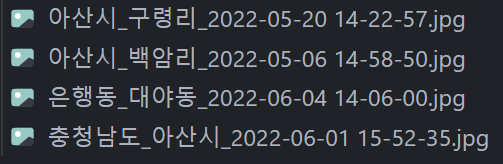

In [2]:
# 주소 가져오기
def getAddress(latitude,longitude):
    lat_lng_str = f'{latitude},{longitude}' #위도 경도 문자열
    
    geolocator = Nominatim(user_agent='South Korea')

    loc = geolocator.reverse(lat_lng_str)
    addlist = loc.address.split(",")
    # print(addlist)
    si = addlist[3].strip()
    do = addlist[2].strip()

    return si,do

In [27]:
getAddress(37.444803999722225,126.79831419972223)

('은행동', '대야동')

## 종합코드

In [7]:
from PIL import Image #파이썬 이미지 라이브러리(Python Image Library)
from PIL.ExifTags import TAGS
from geopy.geocoders import Nominatim

import datetime
from glob import glob
import os

flist = glob(r'사진\*.jpg')

for fname in flist:

    lat, lon, pictime = getPicInfo(fname)
    si,do = getAddress(lat,lon)
    # print(lat, lon, pictime)
    # print(si,do)
    newfname = f'사진\\{si}_{do}_{pictime}.jpg'
    # print(newfname)

    os.rename(fname,newfname)